# Bike Sharing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm  

from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as stats

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

Steps:
1. Reading and Understanding the Data
2. Visualising the Data
3. Data Preparation
4. Splitting the Data into Training and Testing Sets
5. Building a linear model
7. Residual Analysis of the train data
8. Making Predictions Using the Final Model
9. Model Evaluation

## Step 1: Reading and Understanding the Data
This this step we will read the data and understand various variables

In [2]:
bike = pd.read_csv("day.csv")

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


*Note:*
- All variables except date is nummber field
- We can see that there are **no missing values**

In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Data dictionary:**
    
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Data cleaning

#### Filtering data

We can drop the following variable:
- `instant`: As it an index and wont contribute any in the model
- `dteday`: This is a redundant field as all the information of this field is present in other field like `yr`, `month`, etc
- `workingday`: As field like `holiday` and `weekday` covers this information
- `casual`: As we are just in interested in final `cnt`
- `registered`: As we are just in interested in final `cnt`

In [7]:
bike.drop(["instant", "dteday", "workingday", "casual", "registered"], axis=1, inplace=True)

In [8]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


#### Fixing invalid data

In [9]:
# Variable season should have only 4 value
bike.season.unique()

array([1, 2, 3, 4])

In [10]:
# Variable month should only 12 values
bike.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [11]:
# Same for holiday, weekday, weathersit
print(bike.holiday.unique())
print(bike.weekday.unique())
print(bike.weathersit.unique())

[0 1]
[6 0 1 2 3 4 5]
[2 1 3]


All the categorical data are valid as per data dictionary

#### Outliers analysis of numeric variables

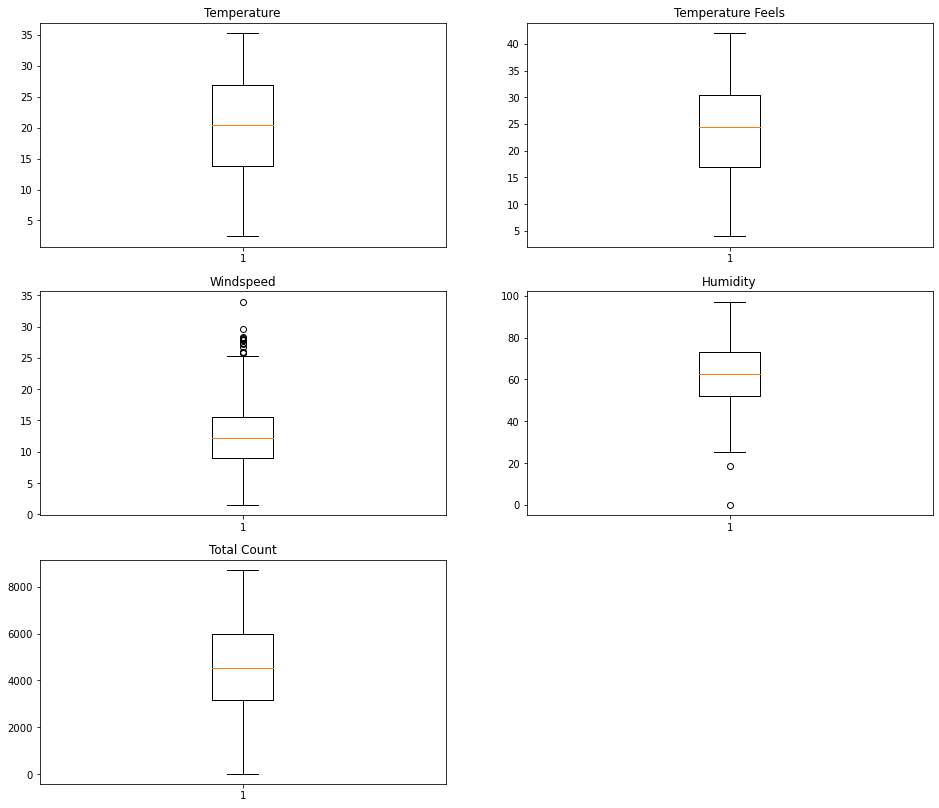

In [12]:
plt.figure(figsize=(16, 14))

plt.subplot(3, 2, 1)
plt.boxplot(bike.temp)
plt.title("Temperature")

plt.subplot(3, 2, 2)
plt.boxplot(bike.atemp)
plt.title("Temperature Feels")

plt.subplot(3, 2, 3)
plt.boxplot(bike.windspeed)
plt.title("Windspeed")

plt.subplot(3, 2, 4)
plt.boxplot(bike.hum)
plt.title("Humidity")

plt.subplot(3, 2, 5)
plt.boxplot(bike.cnt)
plt.title("Total Count")

plt.show()

The distribution does not have any notable outliers

## Step 2: Visualising the Data

#### Analyze numerical variables
Numerical variable can be analyzed using heatmap

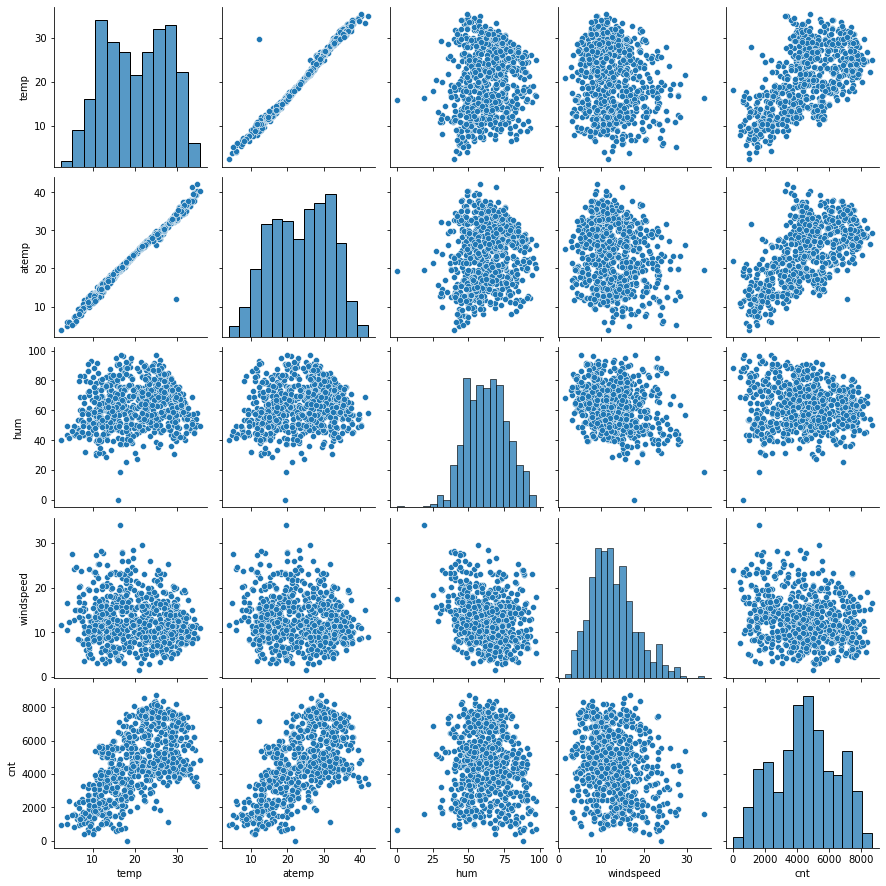

In [13]:
sns.pairplot(bike[['temp','atemp','hum','windspeed',"cnt"]])
plt.show()

*Note:*
- We can see that there is a weak relationship between `temp` and `cnt`
- `temp` and `atemp` has high relationship

Lets plot heatmap and see

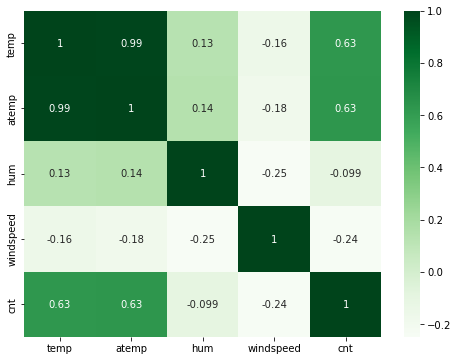

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(bike[['temp','atemp','hum','windspeed',"cnt"]].corr(), annot=True, cmap="Greens")
plt.show()

*Note:*
- There is a weak negative correlation with cnt and windspeed

This a **usecase of linear regresssion** as there is a linear relationship with target variable `cnt` and other variables

Let's drop `atemp` as it has a very high relationship with `temp`, this implies all it's information can be given by `temp` variable

In [15]:
bike.drop("atemp", axis=1, inplace=True)

#### Analyzing categorical variables

Let's do box plot of categorical variables with cnt

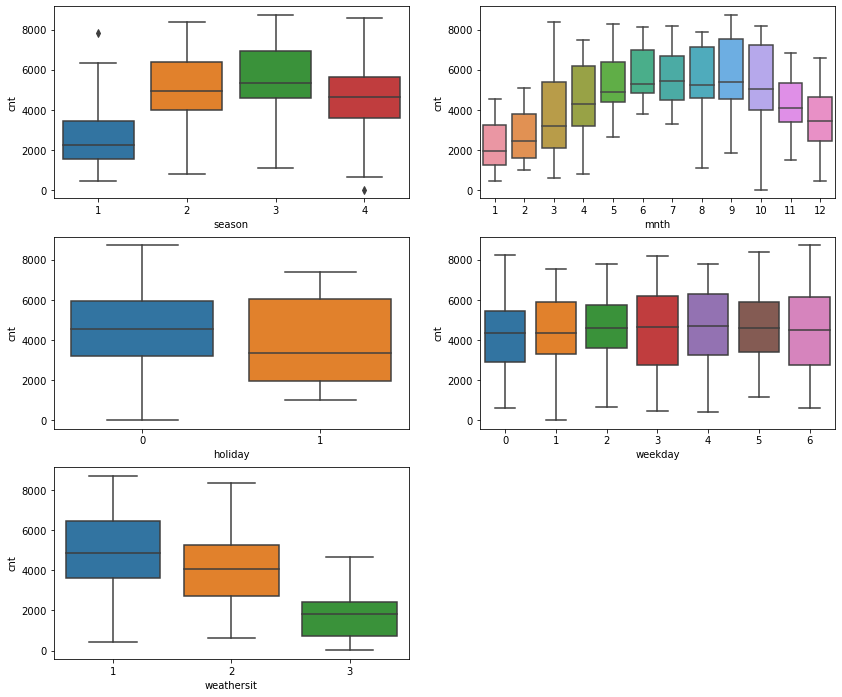

In [16]:
plt.figure(figsize=(14, 12))

plt.subplot(3, 2, 1)
sns.boxplot(x="season", y="cnt", data=bike)

plt.subplot(3, 2, 2)
sns.boxplot(x="mnth", y="cnt", data=bike)

plt.subplot(3, 2, 3)
sns.boxplot(x="holiday", y="cnt", data=bike)

plt.subplot(3, 2, 4)
sns.boxplot(x="weekday", y="cnt", data=bike)

plt.subplot(3, 2, 5)
sns.boxplot(x="weathersit", y="cnt", data=bike)

plt.show()

*Note:*
- We can see that the season summer and fall have a higher `cnt` count
- Month of have June and July have a higher count
- Similarly if it's not a holiday then the count is higher, implying people use bike for office/school commute
- Clear sky weather favours a higher share count

## Step 3: Data Preparation

In [17]:
bike.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,9.305237,43.6957,12.522300,1600


#### Creating dummy variables

In [18]:
# Converting to text for creating dummy variables
bike['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bike['weathersit'].replace({1:'clear',2:'misty_cloudy',3:'light+precipitation',4:'heavy_precipitation'}, inplace=True)
bike['weekday'].replace({0:"sun",1:"mon",2:"tues",3:"wed",4:"thur",5:"fri",6:"sat"},inplace=True)
bike['mnth'].replace({1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:"june",7:"july",8:"aug",9:"sept",10:"oct",11:"nov",12:"dec"},inplace=True)

In [19]:
bike.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,misty_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,misty_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tues,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,clear,9.305237,43.6957,12.522300,1600


In [20]:
Season = pd.get_dummies(bike['season'],drop_first=True)
Weather = pd.get_dummies(bike['weathersit'],drop_first=True)
Weekday = pd.get_dummies(bike['weekday'],drop_first=True)
Month = pd.get_dummies(bike['mnth'],drop_first=True)

bike = pd.concat([bike, Season, Weather, Weekday, Month], axis=1)

In [21]:
bike.drop(['season', 'weathersit', 'weekday', 'mnth'], axis=1, inplace=True)

In [22]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   temp                 730 non-null    float64
 3   hum                  730 non-null    float64
 4   windspeed            730 non-null    float64
 5   cnt                  730 non-null    int64  
 6   spring               730 non-null    uint8  
 7   summer               730 non-null    uint8  
 8   winter               730 non-null    uint8  
 9   light+precipitation  730 non-null    uint8  
 10  misty_cloudy         730 non-null    uint8  
 11  mon                  730 non-null    uint8  
 12  sat                  730 non-null    uint8  
 13  sun                  730 non-null    uint8  
 14  thur                 730 non-null    uint8  
 15  tues                 730 non-null    uin

In [23]:
bike.head()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,light+precipitation,...,dec,feb,jan,july,june,mar,may,nov,oct,sept
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Splitting the train and test data

In [24]:
df_train, df_test = train_test_split(bike, train_size = 0.8, random_state = 100)

In [25]:
print(df_train.shape)
print(df_test.shape)

(584, 28)
(146, 28)


#### Rescaling variables

Let's use MinMax scalar to conver the range of variables between 0 and 1

In [26]:
rescale_vars = ['temp', 'hum', 'windspeed', 'cnt']
scaler = MinMaxScaler()
df_train[rescale_vars] = scaler.fit_transform(df_train[rescale_vars])

In [27]:
df_train.describe()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,light+precipitation,...,dec,feb,jan,july,june,mar,may,nov,oct,sept
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.537414,0.649499,0.319463,0.515792,0.251712,0.246575,0.250000,0.027397,...,0.087329,0.073630,0.087329,0.075342,0.077055,0.090753,0.087329,0.080479,0.092466,0.080479
std,0.500241,0.163378,0.225336,0.144219,0.168114,0.225336,0.434369,0.431387,0.433384,0.163378,...,0.282558,0.261392,0.282558,0.264169,0.266907,0.287504,0.282558,0.272267,0.289931,0.272267
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.340113,0.535852,0.199177,0.350696,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.545191,0.653714,0.294764,0.522837,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.736512,0.752361,0.410413,0.691872,1.000000,0.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Looks like the scaling is done well

#### Splitting X and y

In [28]:
y_train = df_train.pop("cnt")
X_train = df_train

In [29]:
X_train.shape

(584, 27)

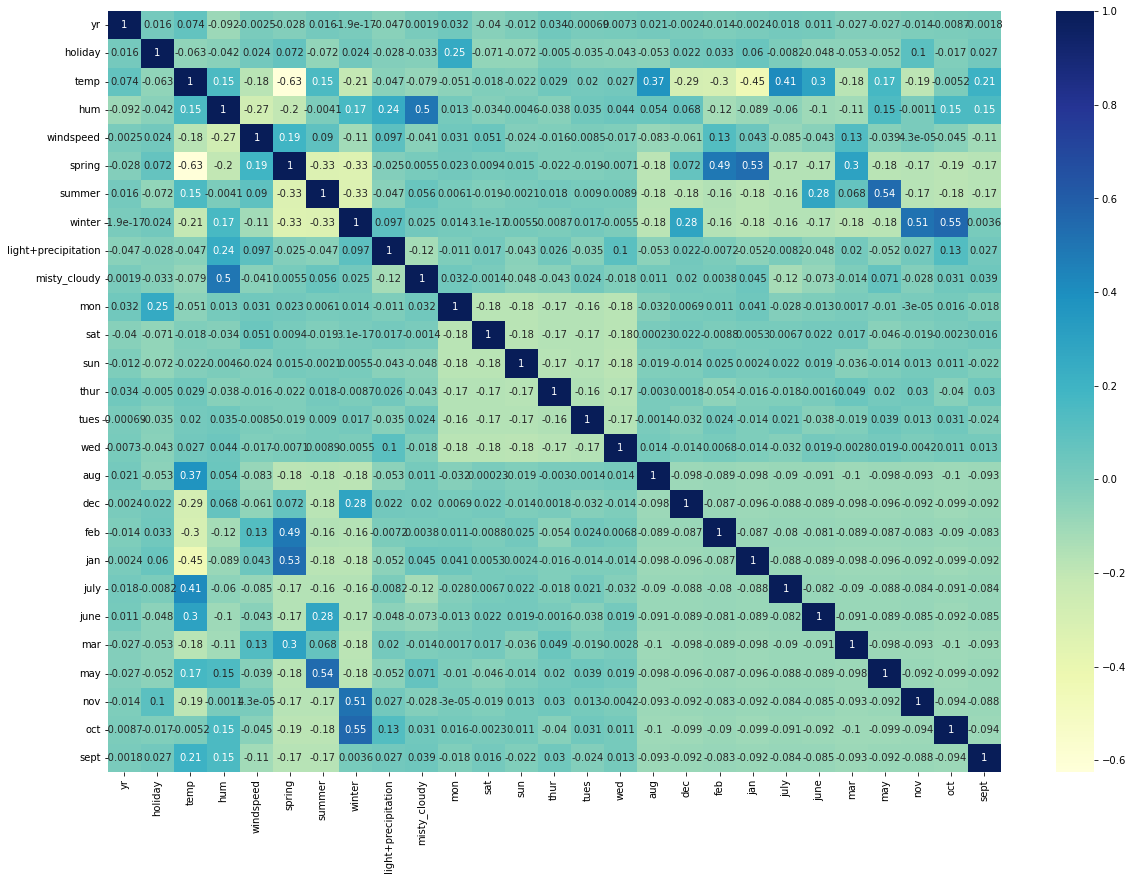

In [30]:
plt.figure(figsize = (20, 14))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Few variables are correlated like if humidity is there then the weather is cloudy. Similarly when spring is there the month is Jan/Feb. These are all expected. We'll filter these out as a part of feature selection

## Step 4: Feature selection and model building

As we can see that the data as 27 feature and quite a few of them are correlated which creates multicollinearity. 

We can eliminate the unimportant features first by using automated way then we'll use the manually way of elimination

#### Eliminate features

In [31]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE with 15 var
rfe = rfe.fit(X_train, y_train)

In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('light+precipitation', True, 1),
 ('misty_cloudy', True, 1),
 ('mon', False, 4),
 ('sat', False, 12),
 ('sun', True, 1),
 ('thur', False, 10),
 ('tues', False, 5),
 ('wed', False, 11),
 ('aug', False, 7),
 ('dec', True, 1),
 ('feb', False, 3),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 9),
 ('mar', False, 13),
 ('may', False, 6),
 ('nov', True, 1),
 ('oct', False, 8),
 ('sept', True, 1)]

Let's remove all the feature which has non-one ranking

In [33]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [34]:
X_train_rfe.shape

(584, 15)

#### Building a model

In [35]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [36]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [37]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     221.3
Date:                Sat, 11 Jun 2022   Prob (F-statistic):          1.06e-225
Time:                        12:03:14   Log-Likelihood:                 603.76
No. Observations:                 584   AIC:                            -1176.
Df Residuals:                     568   BIC:                            -1106.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3733      0.029     12.660      0.000       0.315       0.431
yr                      0.2288      0.007     31.182      0.000       0.214       0.243
holiday                -0.1012      0.023     -4.495      0.000      -0.145      -0.057
temp                    0.4338      0.030     14.241      0.000       0.374       0.494
hum                    -0.1381      0.035     -3.946      0.000      -0.207      -0.069
windspeed              -0.1779      0.023     -7.574      0.000      -0.224      -0.132
spring                 -0.1092      0.014     -7.773      0.000      -0.137      -0.082
winter                  0.0800      0.012      6.473      0.000       0.056       0.104
light+precipitation    -0.2648      0.025    -10.685      0.000      -0.313      -0.216
misty_cloudy           -0.0593      0.010     -6.150      0.000      -0.078      -0.040
sun                    -0.0525      0.010     -5.207      0.000      -0.072      -0.033
dec                    -0.0562      0.015     -3.689      0.000      -0.086      -0.026
jan                    -0.0503      0.016     -3.104      0.002      -0.082      -0.018
july                   -0.0693      0.016     -4.409      0.000      -0.100      -0.038
nov                    -0.0634      0.017     -3.740      0.000      -0.097      -0.030
sept                    0.0479      0.014      3.412      0.001       0.020       0.075
==============================================================================
Omnibus:                       90.709   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.554
Skew:                          -0.743   Prob(JB):                     1.78e-59
Kurtosis:                       5.985   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Note:*
- Looks like we got a good model of **R2 = 0.854** and **R2-adj = 0.850**
- Also **p-values** for all the variables are almost **zero**, implying that all the variables are contributing well to the model
- **P(F-stat) = zero**, we can say that the **model is significant**

##### Check VIF

Let calculate VIF to see if variables have multicolinearity or not

In [38]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,66.70
3,temp,3.61
6,spring,2.85
7,winter,2.19
4,hum,1.95
14,nov,1.63
9,misty_cloudy,1.61
12,jan,1.60
11,dec,1.42
13,july,1.32


##### `const` has **VIF = 66.7**. Let drop it

In [39]:
X_train_rfe.drop(["const"], axis=1, inplace=True)

Lets re-evaluate the model

In [40]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [41]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              1227.
Date:                Sat, 11 Jun 2022   Prob (F-statistic):                        0.00
Time:                        12:03:14   Log-Likelihood:                          531.17
No. Observations:                 584   AIC:                                     -1032.
Df Residuals:                     569   BIC:                                     -966.8
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
yr                      0.2426      0.008     29.542      0.000       0.226       0.259
holiday                -0.1041      0.025     -4.086      0.000      -0.154      -0.054
temp                    0.6371      0.029     21.760      0.000       0.580       0.695
hum                     0.1366      0.031      4.396      0.000       0.076       0.198
windspeed              -0.0304      0.023     -1.319      0.188      -0.076       0.015
spring                 -0.0279      0.014     -1.976      0.049      -0.056      -0.000
winter                  0.1171      0.014      8.622      0.000       0.090       0.144
light+precipitation    -0.3298      0.027    -12.023      0.000      -0.384      -0.276
misty_cloudy           -0.0879      0.011     -8.284      0.000      -0.109      -0.067
sun                    -0.0455      0.011     -3.994      0.000      -0.068      -0.023
dec                    -0.0266      0.017     -1.564      0.118      -0.060       0.007
jan                    -0.0151      0.018     -0.835      0.404      -0.051       0.020
july                   -0.0845      0.018     -4.765      0.000      -0.119      -0.050
nov                    -0.0285      0.019     -1.508      0.132      -0.066       0.009
sept                    0.0402      0.016      2.533      0.012       0.009       0.071
==============================================================================
Omnibus:                       69.221   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.577
Skew:                          -0.676   Prob(JB):                     2.44e-32
Kurtosis:                       5.038   Cond. No.                         13.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### `jan` has p-value of 0.4, lets drop and re-evaluate the model 

In [42]:
X_train_rfe.drop(["jan"], axis=1, inplace=True)

In [43]:
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              1316.
Date:                Sat, 11 Jun 2022   Prob (F-statistic):                        0.00
Time:                        12:03:14   Log-Likelihood:                          530.81
No. Observations:                 584   AIC:                                     -1034.
Df Residuals:                     570   BIC:                                     -972.4
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
yr                      0.2421      0.008     29.571      0.000       0.226       0.258
holiday                -0.1049      0.025     -4.122      0.000      -0.155      -0.055
temp                    0.6432      0.028     22.694      0.000       0.588       0.699
hum                     0.1306      0.030      4.321      0.000       0.071       0.190
windspeed              -0.0304      0.023     -1.316      0.189      -0.076       0.015
spring                 -0.0318      0.013     -2.382      0.018      -0.058      -0.006
winter                  0.1171      0.014      8.625      0.000       0.090       0.144
light+precipitation    -0.3272      0.027    -12.009      0.000      -0.381      -0.274
misty_cloudy           -0.0872      0.011     -8.248      0.000      -0.108      -0.066
sun                    -0.0454      0.011     -3.984      0.000      -0.068      -0.023
dec                    -0.0233      0.017     -1.407      0.160      -0.056       0.009
july                   -0.0859      0.018     -4.870      0.000      -0.121      -0.051
nov                    -0.0271      0.019     -1.437      0.151      -0.064       0.010
sept                    0.0402      0.016      2.534      0.012       0.009       0.071
==============================================================================
Omnibus:                       68.762   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.872
Skew:                          -0.674   Prob(JB):                     5.73e-32
Kurtosis:                       5.024   Cond. No.                         13.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### `windspeed` has p-value of 0.189, lets drop and re-evaluate the model 

In [44]:
X_train_rfe.drop(["windspeed"], axis=1, inplace=True)

In [45]:
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              1415.
Date:                Sat, 11 Jun 2022   Prob (F-statistic):                        0.00
Time:                        12:03:14   Log-Likelihood:                          529.93
No. Observations:                 584   AIC:                                     -1034.
Df Residuals:                     571   BIC:                                     -977.0
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
yr                      0.2413      0.008     29.530      0.000       0.225       0.257
holiday                -0.1055      0.025     -4.143      0.000      -0.155      -0.055
temp                    0.6329      0.027     23.224      0.000       0.579       0.686
hum                     0.1284      0.030      4.251      0.000       0.069       0.188
spring                 -0.0382      0.012     -3.070      0.002      -0.063      -0.014
winter                  0.1160      0.014      8.556      0.000       0.089       0.143
light+precipitation    -0.3311      0.027    -12.219      0.000      -0.384      -0.278
misty_cloudy           -0.0874      0.011     -8.262      0.000      -0.108      -0.067
sun                    -0.0456      0.011     -4.003      0.000      -0.068      -0.023
dec                    -0.0235      0.017     -1.416      0.157      -0.056       0.009
july                   -0.0832      0.018     -4.747      0.000      -0.118      -0.049
nov                    -0.0295      0.019     -1.575      0.116      -0.066       0.007
sept                    0.0422      0.016      2.673      0.008       0.011       0.073
==============================================================================
Omnibus:                       71.883   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.161
Skew:                          -0.688   Prob(JB):                     1.23e-34
Kurtosis:                       5.126   Cond. No.                         12.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### `dec` has p-value of 0.157, lets drop and re-evaluate the model 

In [46]:
X_train_rfe.drop(["dec"], axis=1, inplace=True)

In [47]:
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              1530.
Date:                Sat, 11 Jun 2022   Prob (F-statistic):                        0.00
Time:                        12:03:14   Log-Likelihood:                          528.90
No. Observations:                 584   AIC:                                     -1034.
Df Residuals:                     572   BIC:                                     -981.4
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
yr                      0.2408      0.008     29.470      0.000       0.225       0.257
holiday                -0.1069      0.025     -4.200      0.000      -0.157      -0.057
temp                    0.6412      0.027     24.078      0.000       0.589       0.694
hum                     0.1192      0.030      4.038      0.000       0.061       0.177
spring                 -0.0384      0.012     -3.081      0.002      -0.063      -0.014
winter                  0.1098      0.013      8.546      0.000       0.085       0.135
light+precipitation    -0.3281      0.027    -12.135      0.000      -0.381      -0.275
misty_cloudy           -0.0859      0.011     -8.153      0.000      -0.107      -0.065
sun                    -0.0453      0.011     -3.968      0.000      -0.068      -0.023
july                   -0.0848      0.018     -4.841      0.000      -0.119      -0.050
nov                    -0.0210      0.018     -1.180      0.238      -0.056       0.014
sept                    0.0442      0.016      2.803      0.005       0.013       0.075
==============================================================================
Omnibus:                       68.207   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.729
Skew:                          -0.671   Prob(JB):                     1.67e-31
Kurtosis:                       5.006   Cond. No.                         12.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### `nov` has p-value of 0.238, lets drop and re-evaluate the model 

In [48]:
X_train_rfe.drop(["nov"], axis=1, inplace=True)

In [49]:
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              1668.
Date:                Sat, 11 Jun 2022   Prob (F-statistic):                        0.00
Time:                        12:03:14   Log-Likelihood:                          528.19
No. Observations:                 584   AIC:                                     -1034.
Df Residuals:                     573   BIC:                                     -986.3
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
yr                      0.2407      0.008     29.447      0.000       0.225       0.257
holiday                -0.1104      0.025     -4.362      0.000      -0.160      -0.061
temp                    0.6433      0.027     24.201      0.000       0.591       0.696
hum                     0.1169      0.029      3.968      0.000       0.059       0.175
spring                 -0.0376      0.012     -3.022      0.003      -0.062      -0.013
winter                  0.1035      0.012      8.861      0.000       0.081       0.126
light+precipitation    -0.3268      0.027    -12.094      0.000      -0.380      -0.274
misty_cloudy           -0.0852      0.011     -8.097      0.000      -0.106      -0.065
sun                    -0.0455      0.011     -3.993      0.000      -0.068      -0.023
july                   -0.0851      0.018     -4.856      0.000      -0.119      -0.051
sept                    0.0459      0.016      2.927      0.004       0.015       0.077
==============================================================================
Omnibus:                       66.202   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.959
Skew:                          -0.662   Prob(JB):                     8.15e-30
Kurtosis:                       4.936   Cond. No.                         12.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Let's compute the VIFs

In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,22.96
2,temp,14.33
4,spring,2.33
7,misty_cloudy,2.26
0,yr,2.05
5,winter,2.04
9,july,1.38
6,light+precipitation,1.20
8,sun,1.20
10,sept,1.18


##### `hum` has VIF of 22.96, lets drop and re-evaluate the model 

In [51]:
X_train_rfe.drop(["hum"], axis=1, inplace=True)

In [52]:
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              1787.
Date:                Sat, 11 Jun 2022   Prob (F-statistic):                        0.00
Time:                        12:03:14   Log-Likelihood:                          520.28
No. Observations:                 584   AIC:                                     -1021.
Df Residuals:                     574   BIC:                                     -976.9
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
yr                      0.2398      0.008     28.978      0.000       0.224       0.256
holiday                -0.1087      0.026     -4.242      0.000      -0.159      -0.058
temp                    0.7370      0.012     59.475      0.000       0.713       0.761
spring                 -0.0047      0.009     -0.499      0.618      -0.023       0.014
winter                  0.1304      0.010     13.525      0.000       0.111       0.149
light+precipitation    -0.2902      0.026    -11.282      0.000      -0.341      -0.240
misty_cloudy           -0.0611      0.009     -7.021      0.000      -0.078      -0.044
sun                    -0.0405      0.011     -3.527      0.000      -0.063      -0.018
july                   -0.0980      0.017     -5.621      0.000      -0.132      -0.064
sept                    0.0471      0.016      2.965      0.003       0.016       0.078
==============================================================================
Omnibus:                       62.639   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.099
Skew:                          -0.655   Prob(JB):                     2.26e-26
Kurtosis:                       4.772   Cond. No.                         6.28
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### `spring` has p-value of 0.618, lets drop and re-evaluate the model 

In [53]:
X_train_rfe.drop(["spring"], axis=1, inplace=True)

In [54]:
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              1988.
Date:                Sat, 11 Jun 2022   Prob (F-statistic):                        0.00
Time:                        12:03:14   Log-Likelihood:                          520.15
No. Observations:                 584   AIC:                                     -1022.
Df Residuals:                     575   BIC:                                     -983.0
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
yr                      0.2388      0.008     29.676      0.000       0.223       0.255
holiday                -0.1104      0.025     -4.352      0.000      -0.160      -0.061
temp                    0.7368      0.012     59.522      0.000       0.712       0.761
winter                  0.1314      0.009     13.986      0.000       0.113       0.150
light+precipitation    -0.2913      0.026    -11.373      0.000      -0.342      -0.241
misty_cloudy           -0.0620      0.009     -7.275      0.000      -0.079      -0.045
sun                    -0.0413      0.011     -3.642      0.000      -0.064      -0.019
july                   -0.0970      0.017     -5.605      0.000      -0.131      -0.063
sept                    0.0480      0.016      3.045      0.002       0.017       0.079
==============================================================================
Omnibus:                       59.987   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.099
Skew:                          -0.634   Prob(JB):                     4.55e-25
Kurtosis:                       4.732   Cond. No.                         6.07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Let's check VIF

In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.03
0,yr,1.94
5,misty_cloudy,1.45
7,july,1.32
3,winter,1.29
8,sept,1.17
6,sun,1.16
4,light+precipitation,1.05
1,holiday,1.03


#### Both model and VIFs are good now
- R2 = 0.969
- R2-adj = 0.968
- P(F-stat) = 0
- p-values of all variables are less than 0.002
- VIFs for all the variables are less than or equal to 3

## Step 5: Validating assumptions

#### Residual analysis

In [56]:
y_train_pred = lm.predict(X_train_rfe)

In [57]:
res = y_train - y_train_pred

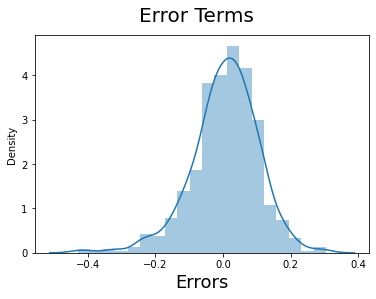

In [58]:
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

- This is a really nice **normal distribution** graph.
- Mean is 0

Text(0.5, 1.0, 'Residual plot')

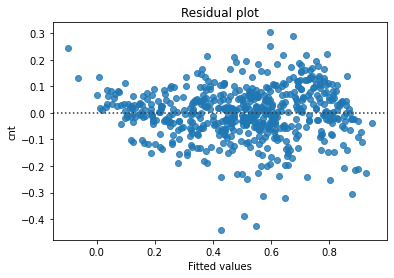

In [59]:
fig = plt.figure()
sns.residplot(y_train_pred, y_train)
plt.xlabel("Fitted values")
plt.title('Residual plot')   

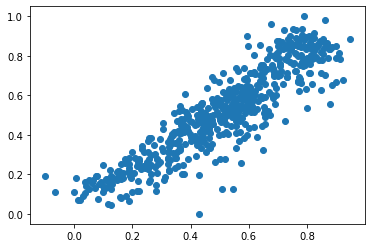

In [60]:
plt.scatter(y_train_pred, y_train)

## Step 5: Making predictions

#### Applying scale on test sets

In [61]:
df_test[rescale_vars] = scaler.transform(df_test[rescale_vars])

In [62]:
df_test.describe()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,light+precipitation,...,dec,feb,jan,july,june,mar,may,nov,oct,sept
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.034247,0.569603,0.635933,0.315127,0.517368,0.226027,0.273973,0.219178,0.034247,...,0.075342,0.089041,0.075342,0.123288,0.102740,0.061644,0.075342,0.089041,0.054795,0.089041
std,0.498699,0.182488,0.238088,0.156357,0.161524,0.212757,0.419697,0.447530,0.415114,0.182488,...,0.264852,0.285783,0.264852,0.329899,0.304664,0.241335,0.264852,0.285783,0.228362,0.285783
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.055683,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.359075,0.534457,0.196160,0.391251,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.560248,0.614856,0.306383,0.508916,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.801929,0.730570,0.411976,0.649994,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.984424,1.002146,0.800793,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
y_test = df_test.pop("cnt")
X_test = df_test

In [65]:
X_test_sm = X_test[X_train_rfe.columns]

In [66]:
y_test_pred = lm.predict(X_test_sm)

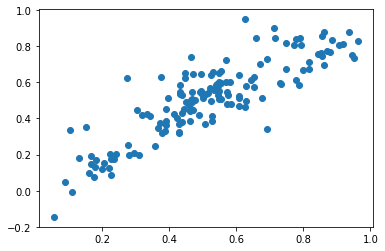

In [67]:
plt.scatter(y_test, y_test_pred)

In [68]:
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8054726971845032
0.723941758238531
